# Demo

Demonstrate `httm` image transformations.

## Getting Started

### Importing `matplotlib`

To start, we will import `matplotlib` and increase the figure size so we can reasonably see artifacts in various FITS images we are going to be looking at.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 8)

In [3]:
!make -C fits_data raw_fits/spot50_raw.fits

/Users/mpwd/Documents/TESS/httm/test/fits_data/../venv/bin/python scripts/make_spot50_pattern raw_fits/spot50_PATTERN_NOISE.fits
rm -f raw_fits/spot50_PATTERN_NOISE.fits.gz
gzip raw_fits/spot50_PATTERN_NOISE.fits
LOG=DEBUG /Users/mpwd/Documents/TESS/httm/test/fits_data/../venv/bin/python ../venv/bin/electron_flux_to_raw --pattern-noise raw_fits/spot50_PATTERN_NOISE.fits.gz electron_flux_fits/spot50.fits raw_fits/spot50_raw.fits
[11:46:09] INFO [httm.transformations.common.check_if_specified_or_default:74] Key "introduce_smear_rows" using default: True
[11:46:09] INFO [httm.transformations.common.check_if_specified_or_default:74] Key "add_shot_noise" using default: True
[11:46:09] INFO [httm.transformations.common.check_if_specified_or_default:74] Key "simulate_blooming" using default: True
[11:46:09] INFO [httm.transformations.common.check_if_specified_or_default:74] Key "add_readout_noise" using default: True
[11:46:09] INFO [httm.transformations.common.check_if_specified_or_default:7

In [4]:
import numpy
from httm.fits_utilities.raw_fits import raw_converter_from_fits

raw_data = raw_converter_from_fits('fits_data/raw_fits/spot50_raw.fits')

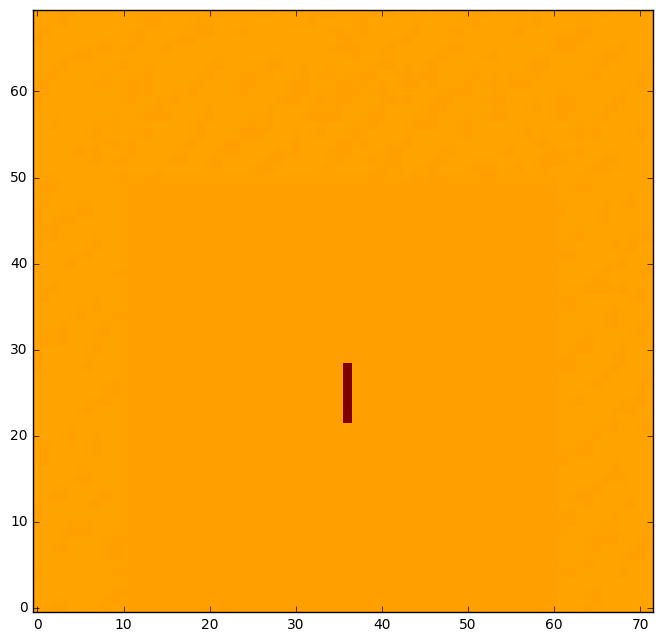

In [5]:
matplotlib.pyplot.imshow(numpy.log10(raw_data.slices[0].pixels-5099), clim=(0,4),interpolation='none')
matplotlib.pyplot.gca().invert_yaxis()

In [6]:
from httm.transformations.raw_converters_to_calibrated import convert_adu_to_electrons

In [7]:
electrons = convert_adu_to_electrons(raw_data)

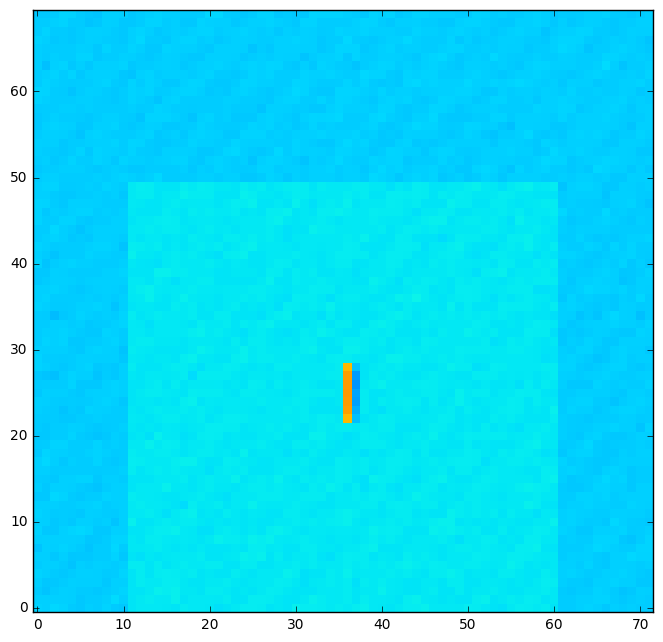

In [8]:
matplotlib.pyplot.imshow(numpy.log10(electrons.slices[0].pixels-32800), clim=(0,7),interpolation='none')
matplotlib.pyplot.gca().invert_yaxis()

In [9]:
from httm.transformations.raw_converters_to_calibrated import remove_baseline, remove_undershoot, remove_smear, remove_start_of_line_ringing

In [10]:
baseless = remove_baseline(electrons)

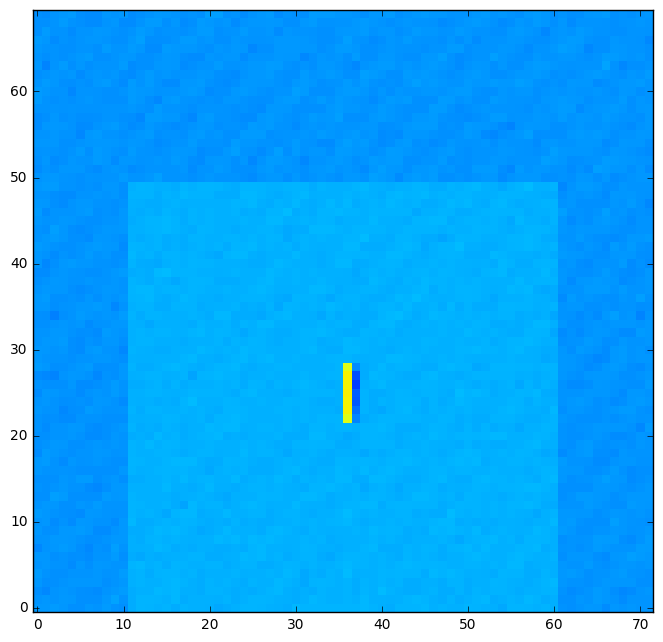

In [11]:
matplotlib.pyplot.imshow(numpy.log10(baseless.slices[0].pixels+150), clim=(0,8),interpolation='none')
matplotlib.pyplot.gca().invert_yaxis()

In [12]:
no_under = remove_undershoot(baseless)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


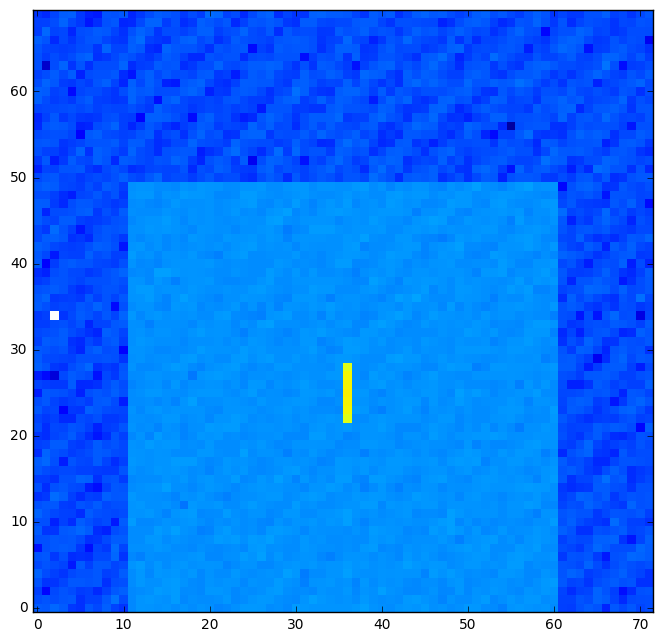

In [13]:
matplotlib.pyplot.imshow(numpy.log10(no_under.slices[0].pixels+40), clim=(0,8),interpolation='none')
matplotlib.pyplot.gca().invert_yaxis()

In [14]:
no_smear=remove_smear(no_under)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


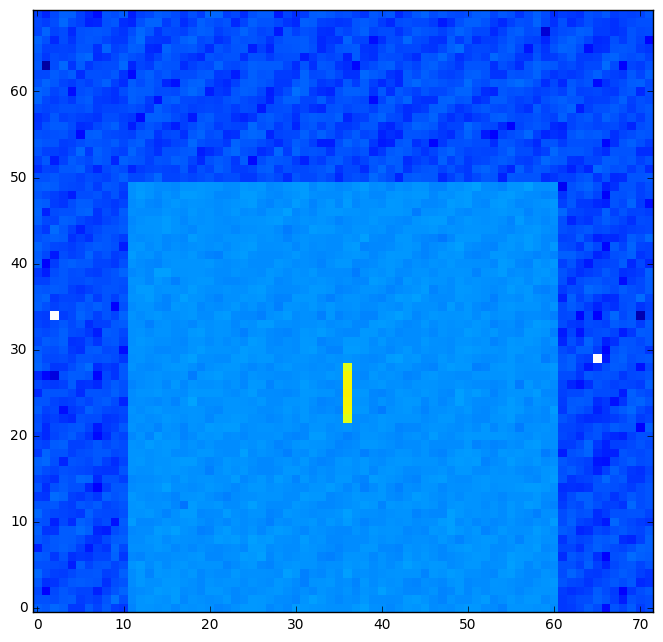

In [15]:
matplotlib.pyplot.imshow(numpy.log10(no_smear.slices[0].pixels+40), clim=(0,8),interpolation='none')
matplotlib.pyplot.gca().invert_yaxis()

In [16]:
no_solr = remove_start_of_line_ringing(no_under)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


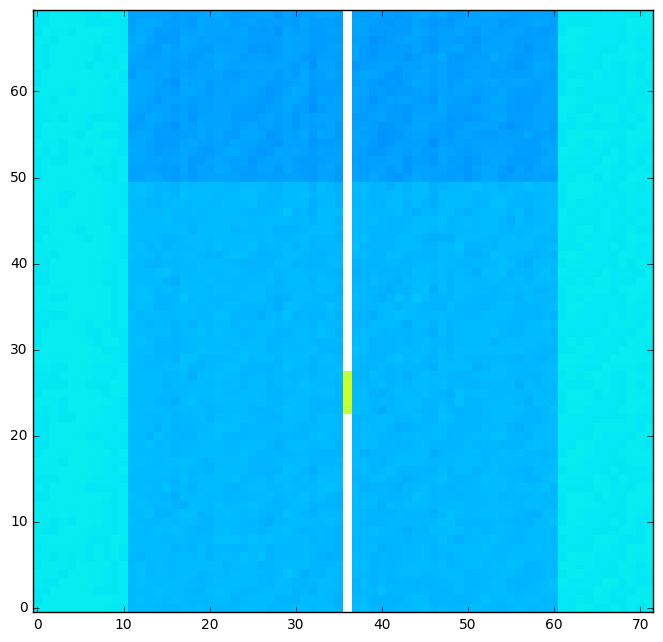

In [25]:
matplotlib.pyplot.imshow(numpy.log10(no_solr.slices[0].pixels+700), clim=(0,8),interpolation='none')
matplotlib.pyplot.gca().invert_yaxis()